1183 296


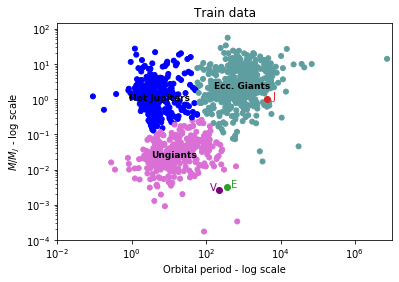

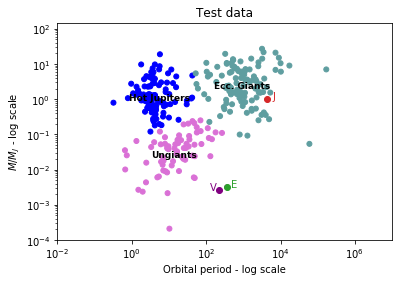

<Figure size 432x288 with 0 Axes>

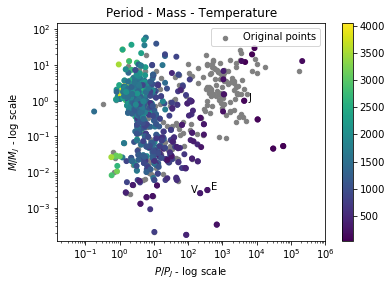

Ecc. Giants
T min = 51 K, T max = 934 K, T med = 520 K
M min = 5.4e-02 M/M_J, M max = 6.8 M/M_J, M med = 3.94 M/M_J
P min = 52.5 days, P max = 59791.4 days, P med = 114.7 days
Hot Jupiters
T min = 765 K, T max = 2581 K, T med = 1486 K
M min = 4.8e-02 M/M_J, M max = 9.7 M/M_J, M med = 0.91 M/M_J
P min = 0.8 days, P max = 12.9 days, P med = 3.5 days
Ungiants
T min = 219 K, T max = 1996 K, T med = 619 K
M min = 2.1e-04 M/M_J, M max = 0.9 M/M_J, M med = 0.03 M/M_J
P min = 0.7 days, P max = 365.2 days, P med = 9.5 days


In [59]:
%run groups_temp.ipynb

In [67]:
#we'll be using data_EU because it has 512 points vs 347 for data_US
#data_EU -> mass, period, temperature

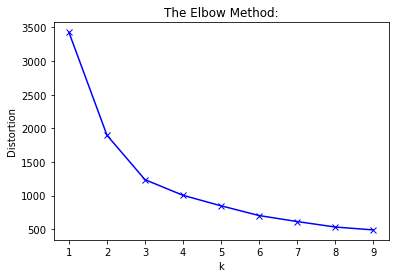

In [73]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np.log(data_EU))
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method:')
plt.show()

In [86]:
train, test = split(data_EU)
print(len(train),len(test))

409 103


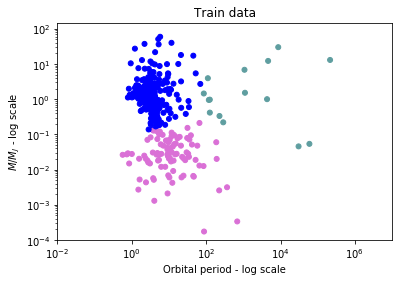

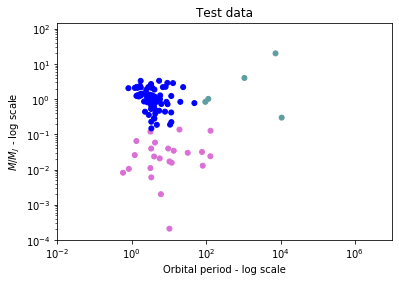

In [93]:
kmeans = KMeans(n_clusters=3).fit(np.log(train))
results = kmeans.predict(np.log(test))
labels = kmeans.labels_

M,P,T = train.obj_phys_mass_mjup, train.obj_orb_period_day, train.temp_eq
M2, P2, T2 = test.obj_phys_mass_mjup, test.obj_orb_period_day, test.temp_eq

label_color,label_color2 = [], []

for l in labels:
    label_color = np.append(label_color, colors[l])
    
for l in results:
    label_color2 =  np.append(label_color2, colors[l])

Ps, Ms, cs, titles = [P,P2], [M,M2],[label_color,label_color2],["Train data","Test data"] 
for i in range(2):
    plt.scatter(Ps[i], Ms[i], c=cs[i], s=25)
    plt.xlabel('Orbital period - log scale')
    plt.ylabel(r'$M/M_J$ - log scale')
    plt.yscale('log')
    plt.xscale('log')
    plt.title(titles[i])
    plt.ylim(10e-5,15e1)
    plt.xlim(10e-3,10e6)
    plt.show()

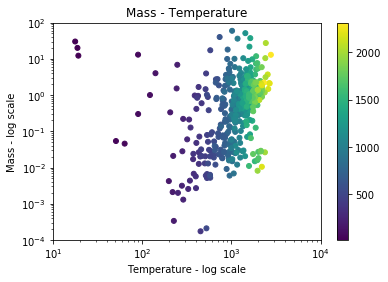

In [94]:
plt.scatter(T,M, s=25,c=T,)
plt.scatter(T2,M2, s=25, c=T2)
plt.xlabel('Temperature - log scale')
plt.ylabel(r'Mass - log scale')
plt.yscale('log')
plt.xscale('log')
plt.title("Mass - Temperature")
plt.colorbar()
plt.ylim(10e-5,10e1)
plt.xlim(10,10e3)
plt.show()

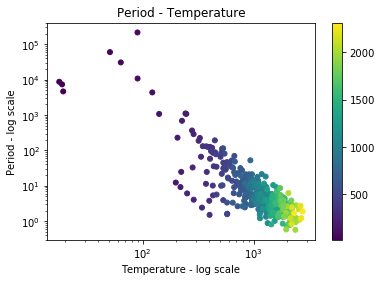

In [95]:
plt.scatter(T,P, s=25,c=T)
plt.scatter(T2, P2, s=25, c=T2)
plt.xlabel('Temperature - log scale')
plt.ylabel(r'Period - log scale')
plt.yscale('log')
plt.xscale('log')
plt.title("Period - Temperature")
plt.colorbar()
plt.show()